In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
import io
data = pd.read_csv('DATASET_Preprocessed.csv')


In [ ]:
data.drop("Unnamed: 0",axis=1,inplace=True)
data.dropna(inplace=True)
data

,tweet,label
0,a a woman you should not complain about cleani...,2
1,boy dat cold tyga dwn bad for cuffin dat hoe i...,1
2,dawg you ever fuck a bitch and she sta to cry ...,1
3,she look like a tranny,1
4,the shit you hear about me might be true or it...,1
...,...,...
50501,get this worse than scum out of our country bu...,0
50502,let this hoe touch this kid i swear to fucking...,0
50503,that is what happens when illegal alien have a...,0
50504,stopimmigration,0


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
labels_=['hatefull','offensive','neither','Tobacco']

In [ ]:
data1 = pd.read_csv('pulp_dialogue_preprocessed.csv')
data1.dialogue=data1.dialogue.str.replace(r"n \' ", "ng ",regex=True)

In [ ]:
data1

,Unnamed: 0,dialogue
0,0,"No , forget it , it is too risky . I am throug..."
1,1,"You always say that , the same thing every tim..."
2,2,I know that is what I always say . I am always...
3,3,"yeah , well , the day of me forgitting are ove..."
4,4,"When you go on like this , you know what you s..."
...,...,...
1182,1182,"And if you ever heard it , it meant your as . ..."
1183,1183,I would like that . But that shit ai not the t...
1184,1184,( to himself ) It is cold .
1185,1185,I think we oughta leave now .


In [ ]:
data1.drop('Unnamed: 0',axis=1,inplace=True)
data1.dropna(inplace=True)

In [ ]:
data1.dialogue.iloc[1006]

'Now Jimmie , do not do nothing stupid like putting that out in front of your house for Elmo the garbage man'

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(text):
    return model(text)

2021-10-12 17:38:02.845449: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-12 17:38:02.847214: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [ ]:
y=data['label']
x=data['tweet']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y)


print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)


(40364,) (40364,)
(10092,) (10092,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB


## Embedding train dataset

In [ ]:
X_train_tweet = embed(list(X_train))
X_test_tweet = embed(list(X_test))

print("After Embeddings vectorizations")
print(X_train_tweet.shape, y_train.shape)
#print(X_cv_tweet.shape, y_cv.shape)
print(X_test_tweet.shape, y_test.shape)
print("="*100)

After Embeddings vectorizations
(40364, 512) (40364,)
(10092, 512) (10092,)


## Embedding pupl dataset

In [ ]:
pulp_test = embed(list(data1.dialogue))

print(pulp_test.shape)
print("="*100)

(1187, 512)


## Evalvating Models on Public dataset

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import joblib
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

In [ ]:
def train_test_model(model, X_train, X_test, y_train, y_test,labels):
    print('Start training...', end='')
    model.fit(X_train, y_train)
    print('done!')
    print("="*80)
    print('Start testing...', end='')
    predictions = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    metrics_report = classification_report(y_test, predictions, target_names=labels)
    precision, recall, fscore, train_support = score(y_test, predictions, average='weighted')
    print('done!')
    print("="*80)
    return predictions, accuracy, metrics_report, (precision, recall, fscore)

Start training...done!
Start testing...done!
accuracy: 0.7567380103051923
              precision    recall  f1-score   support

    hatefull       0.69      0.43      0.53      1632
   offensive       0.77      0.85      0.81      5307
     neither       0.72      0.75      0.73      2730
     Tobacco       0.94      0.91      0.93       423

    accuracy                           0.76     10092
   macro avg       0.78      0.74      0.75     10092
weighted avg       0.75      0.76      0.75     10092



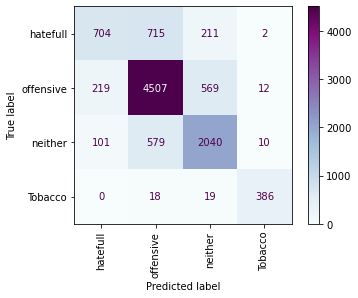

In [ ]:
log_model=LogisticRegression(penalty='l2',max_iter=1000)
predictions, accuracy, metrics_report, log_prf = train_test_model(log_model, X_train_tweet, X_test_tweet, y_train, y_test, labels_)


print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)

plot_confusion_matrix(log_model, X_test_tweet, y_test, display_labels=labels_, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
accuracy: 0.7450455806579469
              precision    recall  f1-score   support

    hatefull       0.58      0.54      0.56      1632
   offensive       0.83      0.76      0.79      5307
     neither       0.68      0.81      0.74      2730
     Tobacco       0.85      0.97      0.91       423

    accuracy                           0.75     10092
   macro avg       0.74      0.77      0.75     10092
weighted avg       0.75      0.75      0.74     10092



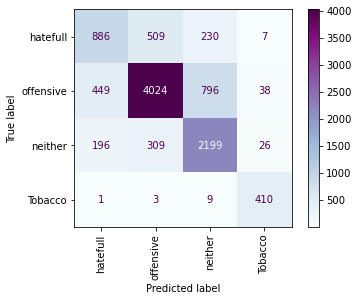

In [ ]:
svm = LinearSVC(class_weight='balanced', verbose=False, max_iter=10000, tol=1e-4, C=0.1)

predictions, accuracy, metrics_report, svm_prf = train_test_model(svm, X_train_tweet, X_test_tweet, y_train, y_test, labels_)


print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)

plot_confusion_matrix(svm, X_test_tweet, y_test, display_labels=labels_, xticks_rotation='vertical', cmap="BuPu")

## Evaluating on Pupl Dataset

In [ ]:
def train_test_model(model, X_train, pulp_test, y_train,labels):
    print('Start training...', end='')
    model.fit(X_train, y_train)
    print('done!')
    print("="*80)
    print('Start testing...', end='')
    predictions = model.predict(pulp_test)
    print('done!')
    print("="*80)
    return predictions

In [ ]:
log_model=LogisticRegression(penalty='l2',max_iter=1000)
predictions = train_test_model(log_model, X_train_tweet, pulp_test, y_train, labels_)

print(predictions)

Start training...done!
Start testing...done!
[1 1 2 ... 2 2 2]


In [ ]:
def change_label(text):
    if text==0:
        return "Hate"
    if text==1:
        return 'Offensive'
    if text==2:
        return 'Neither'
    else:
        return 'Tobacco'
            

In [ ]:
svm = LinearSVC(class_weight='balanced', verbose=False, max_iter=10000, tol=1e-4, C=0.1)

predictions3= train_test_model(svm, X_train_tweet, pulp_test, y_train, labels_)


print(predictions3)

Start training...done!
Start testing...done!
[1 2 2 ... 2 2 2]


In [ ]:
log_data=data1.copy()
log_data['label']=predictions
log_data.label=log_data.label.apply(change_label)

In [ ]:
a=log_data.label.value_counts()
a

Neither      804
Offensive    330
Hate          42
Tobacco       11
Name: label, dtype: int64

In [ ]:
svm_data=data1.copy()
svm_data['label']=predictions3
svm_data.label=svm_data.label.apply(change_label)

In [ ]:
svm_data

,dialogue,label
0,"No , forget it , it is too risky . I am throug...",Offensive
1,"You always say that , the same thing every tim...",Neither
2,I know that is what I always say . I am always...,Neither
3,"yeah , well , the day of me forgitting are ove...",Neither
4,"When you go on like this , you know what you s...",Neither
...,...,...
1182,"And if you ever heard it , it meant your as . ...",Neither
1183,I would like that . But that shit ai not the t...,Neither
1184,( to himself ) It is cold .,Neither
1185,I think we oughta leave now .,Neither


In [ ]:
b=svm_data.label.value_counts()
b

Neither      863
Offensive    219
Hate          78
Tobacco       27
Name: label, dtype: int64

In [ ]:
a=a.to_dict()
b=b.to_dict()

In [ ]:
!pip install prettytable

## Predicted Classes for Pulp Fiction Dialogues

In [ ]:
from prettytable import PrettyTable

x=PrettyTable()
x.field_names=['Models','Hate','Offensive','Neither',"Tobacco"]
x.add_row(["Linear SVM",b['Hate'],b['Offensive'],b['Neither'],b['Tobacco']])
x.add_row(["Logistic Regression",a['Hate'],a['Offensive'],a['Neither'],a['Tobacco']])
print(x)

+---------------------+------+-----------+---------+---------+
|        Models       | Hate | Offensive | Neither | Tobacco |
+---------------------+------+-----------+---------+---------+
|      Linear SVM     |  78  |    219    |   863   |    27   |
| Logistic Regression |  42  |    330    |   804   |    11   |
+---------------------+------+-----------+---------+---------+


In [ ]:
mask=log_data.label=='Hate'
class_0=log_data[mask]
class_0.to_csv('Hate_dialogues_pulp_fiction.csv')
class_0.head(5)

,dialogue,label
24,"What have we been talking about ? Yeah , no- m...",Hate
26,I do not wan na kill anybody either . But they...,Hate
51,Any of you fucking prick move and I will execu...,Hate
57,"Yeah , it break down like this : it is legal t...",Hate
106,Sent a couple of guy over to his place . They ...,Hate


In [ ]:
mask=log_data.label=='Offensive'
class_1=log_data[mask]
class_1.to_csv('Offensive_dialogues_pulp_fiction.csv')
class_1.head(5)

,dialogue,label
0,"No , forget it , it is too risky . I am throug...",Offensive
1,"You always say that , the same thing every tim...",Offensive
7,"Quack , quack , quack , quack , quack , quack ...",Offensive
8,"Well take heart , 'cause you are never gon na ...",Offensive
16,"Fucking A it worked , that is what I am talkin...",Offensive


In [ ]:
mask=log_data.label=='Neither'
class_2=log_data[mask]
class_2.to_csv('Neither_dialogues_pulp_fiction.csv')
class_2.head(5)

,dialogue,label
2,I know that is what I always say . I am always...,Neither
3,"yeah , well , the day of me forgitting are ove...",Neither
4,"When you go on like this , you know what you s...",Neither
5,"I sound like a sensible fucking man , is what ...",Neither
6,You sound like a duck .,Neither


In [ ]:
mask=log_data.label=='Tobacco'
class_3=log_data[mask]
class_3.to_csv('Tobacco_dialogues_pulp_fiction.csv')
class_3.head(5)

,dialogue,label
55,"Yeah , it is legal , but is ai not a hundred p...",Tobacco
224,"Vincent Vega , our man in Amsterdam , git your...",Tobacco
255,"Remember , I just got back from Amsterdam .",Tobacco
258,"This ai not Amsterdam , Vince . This is a sell...",Tobacco
314,Rolling a smoke .,Tobacco


In [ ]:
"I’ll be okay just not today and probably not tomorrow."

"I really want to talk to someone about my thoughts and feelings but I can’t."

"The only thing more exhausting than being depressed is pretending that you’re not."


"There is hope, even when your brain tells you there isn’t."


"Behind my smile is a hurting heart, behind my laugh I’m falling apart. Look closely at me and you will see, the girl I am, it isn’t me."


"Depression on my left, loneliness on my right. They don’t need to show me their badges. I know these guys very well."






"It’s hard to be a friend to someone who’s depressed, but it is one of the kindest, noblest, and best things you will ever do"



"Listen closely to the songs I play because the lyrics speak the words I fail to say."

"The magic will happen when you stop listening to the negative voices in your head and start believing in yourself."


"I wish you could hear all the words I’m too afraid to say."


 

"They tell me I’m not trying but how would they know."


"I wish I didn’t care all the time."


"There is no person in this whole world who is a mistake, no matter how different that person may seem"


"We cannot stop what’s already occurred. We can just try again till it gets better."



"I don’t think people realize how much strength it takes to pull your own self out of a dark place mentally. So if you’ve done that today or any day I’m proud of you."


"I hate seeing everything blooming around me while I’m here still withering into nothingness, i feel like I’m already dead so what difference would it make."



 
"Any fool can be happy. It takes a man with a real heart to make beauty out of the stuff that makes us weep."

"It’s easy to say you’re over someone if you aren’t seeing them. The challenge is to look them in the eye and see their smile and hear their voice and still be able to say 'this is not what I want anymore.'"

"In times of pain, when the future is too terrifying to contemplate and the past too painful to remember, I have learned to pay attention to right now. The precise moment I was in was always the only safe place for me. "

"Depression is the inability to construct a future."

"The feeling when someone asks you if you’re okay and just want to cry every little thing in your life because everything you but everything you say is just: “I’m fine.”

"I think the reason why I get upset so quickly is that I would never do the things people do to hurt me, to hurt them."




"I will love the light for it shows me the way, yet I will endure the darkness for it shows me the stars."


"The worst kind of sadness is not being able to explain why."



"Give yourself another day, another chance. You will find your courage eventually. Don’t give up on yourself just yet."



"No darkness lasts forever. And even there, there are stars."


"There are wounds that never show on the body that are deeper and more hurtful than anything that bleeds."


"I don’t think people understand how stressful it is to explain what’s going on in your head when you don’t even understand it yourself."



"You say you’re ‘depressed’ – all I see is resilience. You are allowed to feel messed up and inside out. It doesn’t mean you’re defective – it just means you’re human."


"I’m tired of trying, sick of crying, I know I’ve been smiling, but inside I’m dying."




"If you don’t think your anxiety, depression, sadness, and stress impact your physical health, think again. All of these emotions trigger chemical reactions in your body, which can lead to inflammation and a weakened immune system. Learn how to cope, sweet friend. There will always be dark days."


"Depression is the devil’s playground."

"Once you choose hope, anything is possible."

"I already know I’m not good enough."

"Sleeping is so hard when you can’t stop thinking."

"I say sorry a lot because I secretly feel that everything is my fault."


"Behind my pretty smile is a story you’ll never understand."

"No person can hate me more than I can hate myself."

"So many words to say and no way to say them."

"The worst sadness is the sadness you’ve taught yourself to hide."

"My biggest problem is overthinking everything."

"Everything is changing and I don’t know where I fit anymore."


"You will never understand the hell I feel inside my head."

"Love me for who I am… not for what you want me to be."

"The perfect is the enemy of the good."
"I hate this feeling like I’m here, but I’m not."

"Sleep isn’t just sleeping anymore, it’s an escape."
"Smooth seas do not make skillful sailors."


"Every thought is a battle. Every breath is a war. And I don’t think I am winning anymore."

"You’re like a grey sky. You’re beautiful, even though you don’t want to be."

"I’m exhausted from trying to be stronger than I feel."
"Pain changes people, it makes them trust less, overthink more, and shut people out."

"You don’t have to live a lie. Living a lie will mess you up. It will send you into depression. It will warp your values."

"If you know someone who’s depressed, please resolve never to ask them why. Depression isn’t a straightforward response to a bad situation; depression just is, like the weather."

"I lost myself somewhere in the darkness."
"The worst kind of sadness is not being able to explain why."

"I may have looked happy but inside I was hopelessly depressed."

"Although the world is full of suffering, it is also full of overcoming it."

"I’ll never forget how the depression and loneliness felt good and bad at the same time."


"The hardest thing about depression is that it is addictive. It begins to feel uncomfortable not to be depressed. You feel guilty for feeling happy."

"Listen to the people who love you. Believe that they are worth living for even when you don’t believe it. Seek out the memories depression takes away and project them into the future. Be brave; be strong; take your pills. Exercise because it’s good for you even if every step weighs a thousand pounds. Eat when food itself disgusts you. Reason with yourself when you have lost your reason."

"I cannot make you understand, I cannot make anyone understand what is happening inside me, I cannot even explain it to myself."

"The worst feeling is when something is killing you inside, and you have to act like you don’t care."

"I don’t think people really understand just how stressful it is to explain what’s on your mind when you don’t even understand it yourself."

"I think I’m afraid to be happy because whenever I get too happy, something bad always happens."


"No matter what happens, or how bad it seems today, life does go on, and it will be better tomorrow."

"There are some things about myself I can’t explain to anyone. There are some things I don’t understand at all."

"Depression isn’t just being a bit sad. It’s feeling nothing. It’s not wanting to be alive anymore."

"I was so scared to give up depression, fearing that somehow the worst part of me was actually all of me."

"Depression lies. It tells you you’ve always felt this way, and you always will. But you haven’t, and you won’t."

"I keep moving ahead, as always, knowing deep down inside that I am a good person and that I am worthy of a good life."

"When people don’t know exactly what depression is, they can be judgmental."

"I think I’m afraid of being happy because whenever I get too happy something bad always happens."

"Every man has his secret sorrows which the world knows not, and often times we call a man cold when he is only sad."

"Life is ten percent what you experience and ninety percent how you respond to it."

"Don’t let life discourage you; everyone who got where he is had to begin where he was."

"That is all I want in life: for this pain to seem purposeful."


"You don’t have to live a lie. Living a lie will mess you up. It will send you into depression. It will warp your value"

"Whenever someone tells me to ‘Just be happy,’ I want to yell, ‘Oh, hey, depression’s gone! Why didn’t I think of that?’ But usually, I just roll my eyes instead."

"A depressing and difficult passage has prefaced every page I have turned in life."

"I didn’t want to wake up. I was having a much better time asleep. And that’s really sad. It was almost like a reverse nightmare, like when you wake up from a nightmare you’re so relieved. I woke up into a nightmare."

"It’s so difficult to describe depression to someone who’s never been there because it’s not sadness. I know sadness. Sadness is to cry and to feel. But it’s that cold absence of feeling – that really hollowed-out feeling."


In [ ]:
"I found that with depression, one of the most important things you could realize is that you’re not alone."

"You say you’re ‘depressed’ – all I see is resilience. You are allowed to feel messed up and inside out. It doesn’t mean you’re defective – it just means you’re human."

"Try to understand the blackness, lethargy, hopelessness, and loneliness they’re going through. Be there for them when they come through the other side. It’s hard to be a friend to someone who’s depressed, but it is one of the kindest, noblest, and best things you will ever do. "

"People who have never dealt with depression think it’s just being sad or being in a bad mood. That’s not what depression is for me; it’s falling into a state of grayness and numbness."

"I go through a lot of depression, and I know other people do, too, but I have an outlet that so many people don’t. If you have that inside of you and can’t get it out, what do you do?"


"A big part of depression is feeling really lonely, even if you’re in a room full of a million people. "

"When you’re surrounded by all these people, it can be lonelier than when you’re by yourself. You can be in a huge crowd, but if you don’t feel like you can trust anyone or talk to anybody, you feel like you’re really alone."

"Mental pain is less dramatic than physical pain, but it is more common and also more hard to bear. The frequent attempt to conceal mental pain increases the burden: it is easier to say, ‘My tooth is aching’ than to say, ‘My heart is broken.’"
"Depression, for me, has been a couple of different things – but the first time I felt it, I felt helpless, hopeless, and things I had never felt before. I lost myself and my will to live."

"That’s the thing about depression: A human being can survive almost anything, as long as she sees the end in sight. But depression is so insidious, and it compounds daily, that it’s impossible to ever see the end."

"I am bent, but not broken. I am scarred, but not disfigured. I am sad, but not hopeless. I am tired, but not powerless. I am angry, but not bitter. I am depressed, but not giving up."

"I’ll never forget how the depression and loneliness felt good and bad at the same time. Still does."

"I have depression. But I prefer to say, ‘I battle’ depression instead of ‘I suffer’ with it. Because depression hits, but I hit back. Battle on."

"Depression is being colorblind and constantly told how colorful the world is. "

"It is very hard to explain to people who have never known serious depression or anxiety the sheer continuous intensity of it. There is no off switch."

"There is no point treating a depressed person as though she were just feeling sad, saying, ‘There now, hang on, you’ll get over it.’ Sadness is more or less like a head cold – with patience, it passes. Depression is like cancer. "
"Mental illness is so much more complicated than any pill that any mortal could invent."
"Depression, suffering and anger are all part of being human."

"Every man has his secret sorrows which the world knows not; and often times we call a man cold when he is only sad."

"There are wounds that never show on the body that are deeper and more hurtful than anything that bleeds."

"I couldn’t be with people and I didn’t want to be alone. Suddenly my perspective whooshed and I was far out in space, watching the world. I could see millions and millions of people, all slotted into their lives; then I could see me—I’d lost my place in the universe. It had closed up and there was nowhere for me to be. I was more lost than I had known it was possible for any human being to be. "

"I didn’t want my picture taken because I was going to cry. I didn’t know why I was going to cry, but I knew that if anybody spoke to me or looked at me too closely the tears would fly out of my eyes and the sobs would fly out of my throat and I’d cry for a week. I could feel the tears brimming and sloshing in me like water in a glass that is unsteady and too full."

"Depression presents itself as a realism regarding the rottenness of the world in general and the rottenness of your life in particular. But the realism is merely a mask for depression’s actual essence, which is an overwhelming estrangement from humanity. The more persuaded you are of your unique access to the rottenness, the more afraid you become of engaging with the world; and the less you engage with the world, the more perfidiously happy-faced the rest of humanity seems for continuing to engage with it."
"When people don’t know exactly what depression is, they can be judgmental."

"It is important not to suppress your feelings altogether when you are depressed. It is equally important to avoid terrible arguments or expressions of outrage. You should steer clear of emotionally damaging behavior. People forgive, but it is best not to stir things up to the point at which forgiveness is required. When you are depressed, you need the love of other people, and yet depression fosters actions that destroy that love. Depressed people often stick pins into their own life rafts. The conscious mind can intervene. One is not helpless."


"Depression on my left. Loneliness on my right. They don’t need to show me their badges. I know these guys very well."

"Maybe we all have darkness inside of us and some of us are better at dealing with it than others."

"Sometimes I just think depression’s one way of coping with the world. Like, some people get drunk, some people do drugs, some people get depressed. Because there’s so much stuff out there that you have to do something to deal with it. "

"Listen to the people who love you. Believe that they are worth living for even when you don’t believe it. Seek out the memories depression takes away and project them into the future. Be brave; be strong; take your pills. Exercise because it’s good for you even if every step weighs a thousand pounds. Eat when food itself disgusts you. Reason with yourself when you have lost your reason."

"That is all I want in life: for this pain to seem purposeful."

"It’s not all bad. Heightened self-consciousness, apartness, an inability to join in, physical shame and self-loathing—they are not all bad. Those devils have been my angels. Without them I would never have disappeared into language, literature, the mind, laughter and all the mad intensities that made and unmade me."
"When you’re depressed you don’t control your thoughts, your thoughts control you. I wish people understood that."

"Depression is feeling like you’ve lost something but having no clue when or where you last had it. Then one day you realize what you lost is yourself."

"People think depression is sadness. People think depression is crying. People think depression is dressing in black. But people are wrong. Depression is the constant feeling of being numb. Being numb to emotions, being numb to life. You wake up in the morning just to go to bed again."

"Everyday is a second chance."

"I need one of those long hugs where you kinda forget whatever else is happening around you for minute. "

"You’re not a bad person for the ways you tried to kill your sadness."

"I don’t want to do anything. I don’t even want to start this day because then I’ll just be expected to finish it."

"Having anxiety and depression is like being scared and tired at the same time. It’s the fear of failure, but no urge to be productive. It’s wanting friends, but hate socializing. It’s wanting to be alone, but not wanting to be lonely. It’s feeling everything at once then feeling paralyzingly numb."

"If you know someone who’s depressed, please resolve never to ask them why. Depression isn’t a straightforward response to a bad situation; depression just is, like the weather."

"I’m not better, you know. The weight hasn’t left my head. I feel how easily I could fall back into it, lie down and not eat, waste my time and curse wasting my time, look at my homework and freak out and go and chill at Aaron’s, look at Nia and be jealous again, take the subway home and hope that it has an accident, go and get my bike and head to the Brooklyn Bridge. All of that is still there. The only thing is, it’s not an option now. It’s just… a possibility, like it’s a possibility that I could turn to dust in the next instant and be disseminated throughout the universe as an omniscient consciousness. It’s not a very likely possibility."

"People talk about physical fitness, but mental health is equally important. I see people suffering, and their families feel a sense of shame about it, which doesn’t help. One needs support and understanding. I am now working on an initiative to create awareness about anxiety and depression and help people."

"Whenever I have a good few months and I think I’ve gotten over the worst on my depression, it silently returns. This isn’t a battle I asked to fight. I’m tired of knowing it’s always coming back."

"The worst type of crying wasn’t the kind everyone could see–the wailing on street corners, the tearing at clothes. No, the worst kind happened when your soul wept and no matter what you did, there was no way to comfort it. A section withered and became a scar on the part of your soul that survived. For people like me and Echo, our souls contained more scar tissue than life. "

"Some friends don’t understand this. They don’t understand how desperate I am to have someone say, I love you and I support you just the way you are because you’re wonderful just the way you are. They don’t understand that I can’t remember anyone ever saying that to me. I am so demanding and difficult for my friends because I want to crumble and fall apart before them so that they will love me even though I am no fun, lying in bed, crying all the time, not moving. Depression is all about If you loved me you would."

"When you’re lost in those woods, it sometimes takes you a while to realize that you are lost. For the longest time, you can convince yourself that you’ve just wandered off the path, that you’ll find your way back to the trailhead any moment now. Then night falls again and again, and you still have no idea where you are, and it’s time to admit that you have bewildered yourself so far off the path that you don’t even know from which direction the sun rises anymore."

"I believe that words are strong, that they can overwhelm what we fear when fear seems more awful than life is good. ― Andrew Solomon, The Noonday Demon: An Atlas of Depression

"It’s my experience that people are a lot more sympathetic if they can see you hurting, and for the millionth time in my life I wish for measles or smallpox or some other easily understood disease just to make it easier on me and also on them."

"The lotus is the most beautiful flower, whose petals open one by one. But it will only grow in the mud. In order to grow and gain wisdom, first you must have the mud — the obstacles of life and its suffering. … The mud speaks of the common ground that humans share, no matter what our stations in life. … Whether we have it all or we have nothing, we are all faced with the same obstacles: sadness, loss, illness, dying and death. If we are to strive as human beings to gain more wisdom, more kindness and more compassion, we must have the intention to grow as a lotus and open each petal one by one.  "
"I’ve got a bad case of the : am guilts — you know, when you lie in bed awake and replay all those things you didn’t do right? Because, as we all know, nothing solves insomnia like a nice warm glass of regret, depression and self-loathing. "

"Losing your life is not the worst thing that can happen. The worst thing is to lose your reason for living."
"In addition to my other numerous acquaintances, I have one more intimate confidant… My depression is the most faithful mistress I have known — no wonder, then, that I return the love. "

"You’re like a grey sky. You’re beautiful, even though you don’t want to be."
"Depression is melancholy minus its charms. "

"Don’t worry if people think you’re crazy. You are crazy. You have that kind of intoxicating insanity that lets other people dream outside of the lines and become who they’re destined to be."

"Even when I try to stir myself up, I just get irritated because I can’t make anything come out. And in the middle of the night I lie here thinking about all this. If I don’t get back on track somehow, I’m dead, that’s the sense I get. There isn’t a single strong emotion inside me. "

"Life is ten percent what you experience and ninety percent how you respond to it."

"Understanding the difference between healthy striving and perfectionism is critical to laying down the shield and picking up your life. Research shows that perfectionism hampers success. In fact, it’s often the path to depression, anxiety, addiction, and life paralysis. "

"Depression isn’t a war you win. It’s a battle you fight every day. You never stop, never get to rest. It’s one bloody fray after another. "

"I am terrified by this dark thing that sleeps in me; All day I feel its soft, feathery turnings, its malignity. "

"Depression is like a bruise that never goes away. A bruise in your mind. You just got to be careful not to touch it where it hurts. It’s always there, though. "

"Crying is one of the highest devotional songs. One who knows crying, knows spiritual practice. If you can cry with a pure heart, nothing else compares to such a prayer. Crying includes all the principles of Yoga. "
"One of the things that baffles me (and there are quite a few) is how there can be so much lingering stigma with regards to mental illness, specifically bipolar disorder. In my opinion, living with manic depression takes a tremendous amount of balls. Not unlike a tour of Afghanistan (though the bombs and bullets, in this case, come from the inside). At times, being bipolar can be an all-consuming challenge, requiring a lot of stamina and even more courage, so if you’re living with this illness and functioning at all, it’s something to be proud of, not ashamed of. They should issue medals along with the steady stream of medication."

"No amount of love can cure madness or unblacken one’s dark moods. Love can help, it can make the pain more tolerable, but, always, one is beholden to medication that may or may not always work and may or may not be bearable"

"Take a shower, wash off the day. Drink a glass of water. Make the room dark. Lie down and close your eyes. Notice the silence. Notice your heart. Still beating. Still fighting. You made it, after all. You made it, another day. And you can make it one more. You’re doing just fine."

"If you could read my mind, you wouldn’t be smiling.― Tamara Ireland Stone, Every Last Word

"Rain makes me feel less alone. All rain is, is a cloud- falling apart, and pouring its shattered pieces down on top of you. It makes me feel good to know I’m not the only thing that falls apart . It makes me feel better to know other things in nature can shatter."

"They always call depression the blues, but I would have been happy to waken to a periwinkle outlook. Depression to me is urine yellow, washed out, exhausted miles of weak piss."
"The hardest thing about depression is that it is addictive. It begins to feel uncomfortable not to be depressed. You feel guilty for feeling happy."

"Perhaps depression is caused by asking oneself too many unanswerable questions."

"She was a free bird one minute: queen of the world and laughing. The next minute she would be in tears like a porcelain angel, about to teeter, fall and break. She never cried because she was afraid that something ‘would’ happen; she would cry because she feared something that could render the world more beautiful, ‘would not’ happen."

"But he just gives me that dark smile, settles into my favorite chair, puts his feet on my table and lights a cigar, filling the place with his awful smoke. Loneliness watches and sighs, then climbs into my bed and pulls the covers over himself, fully dressed, shoes and all. He’s going to make me sleep with him again tonight, I just know it."

"Depression weighs you down like a rock in a river. You don’t stand a chance. You can fight and pray and hope you have the strength to swim, but sometimes, you have to let yourself sink. Because you’ll never know true happiness until someone or something pulls you back out of that river–and you’ll never believe it until you realize it was you, yourself who saved you."

"In the silence of night I have often wished for just a few words of love from one man, rather than the applause of thousands of people."

"Dead, but not allowed to die. Alive, but as good as dead."

"Almost everyone is overconfident—except the people who are depressed, and they tend to be realists."
"I didn’t know why I was feeling anxious or what was wrong with me, when I would go into public and feeling like I could vomit. I didn’t know why I wanted to sit on a couch while I was supposedly becoming something that everyone was so excited for me."

"I understand your pain. Trust me, I do. I’ve seen people go from the darkest moments in their lives to living a happy, fulfilling life. You can do it too. I believe in you. You are not a burden. You will NEVER BE a burden."

"Depression is your body saying, ‘I don’t want to be this character anymore. I don’t want to hold up this avatar that you’ve created in the world. It’s too much for me. You should think of the word ‘depressed’ as ‘deep rest.’ Your body needs to be depressed. It needs deep rest from the character that you’ve been trying to play."
"I’m very available to depression. I can slip in and out of it quite easily. It started when my granddad died, when I was about , and while I never had a suicidal thought, I have been in therapy, lots. "

"I moved out of L.A., went into a severe depression, started seeing a therapist and had to go on antidepressants for the first time in my life. It was scary and lonely. I can’t believe I came back from that point. "

"I had everything I needed to be happy. And yet, for much of the last year, I felt unhappy. I started taking an antidepressant, which helped and I started sharing the news with friends and family—I felt like everyone deserved an explanation, and I didn’t know how else to say it other than the only way I know: just saying it. It got easier and easier to say it aloud every time."

"I felt plagued with a negative attitude and a sense that I was permanently in the shade. I’m normally such a bubbly, positive person, and all of a sudden I stopped feeling like myself. Anyone can be affected, despite their level of success or their place on the food chain. In fact, there is a good chance you know someone who is struggling with it since nearly % of American adults face some form of mental illness in their lifetime. So why aren’t we talking about it? "

 
"My brain and my heart are really important to me. I don’t know why I wouldn’t seek help to have those things be as healthy as my teeth. I go to the dentist. So why wouldn’t I go to a shrink?"

"Depression doesn’t take away your talents—it just makes them harder to find."

"I have probably been very close to a complete breakdown on numerous occasions when all sorts of grief and sort of lies and misconceptions and everything are coming to you from every angle."

"I tend to get pretty depressed and I have some issues with anxiety and things like that … For me, it’s more psychological. Exercise is a means of expelling those demons."

"After every Olympics I think I fell into a major state of depression, and after  that was probably the hardest fall for me. I didn’t want to be in the sport anymore…a year and a half, two years after that…I didn’t want to be alive anymore. I think people actually finally understand it’s real. People are talking about it and I think this is the only way that it can change."

"I disliked myself so intensely. It was just a mindset. I didn’t know how to love myself. I didn’t know how to love anybody."

"It’s my mission to share this with the world and to let them know that there is life on the other side of those dark times that seem so hopeless and helpless. I want to show the world that there is life — surprising, wonderful and unexpected life after diagnosis."

"I went through a time where I was really depressed. Like, I locked myself in my room and my dad had to break my door down. It was a lot to do with, like, I had really bad skin, and I felt really bullied because of that. But I never was depressed because of the way someone else made me feel, I just was depressed."

"I was  years old. I had my own TV show. I was happy with my work, but I couldn’t figure out what it was; it doesn’t always make sense is my point. It’s not just people who can’t find a job, or can’t fit in in society that struggle with depression sometimes."

"What I would tell kids going through anxiety, which I have and can relate to, is that you’re so normal. Everyone experiences a version of anxiety or worry in their lives, and maybe we go through it in a different or more intense way for longer periods of time, but there’s nothing wrong with you. To be a sensitive person that cares a lot, that takes things in in a deep way is actually part of what makes you amazing… I wouldn’t trade it for the world, even when there are really hard times. Don’t ever feel like you’re a weirdo for it because we’re all weirdos."

"You are the one thing in this world, above all other things, that you must never give up on. When I was in middle school, I was struggling with severe anxiety and depression and the help and support I received from my family and a therapist saved my life. Asking for help is the first step. You are more precious to this world than you’ll ever know."

"It is okay to have depression, it is okay to have anxiety and it is okay to have an adjustment disorder. We need to improve the conversation. We all have mental health in the same way we all have physical health."

"All it takes is a beautiful fake smile to hide an injured soul and they will never notice how broken you really are."

"A child’s mental health is just as important as their physical health and deserves the same quality of support. No one would feel embarrassed about seeking help for a child if they broke their arm."
"Being an actress hasn’t made me insecure. I was insecure long before I declared I was an actress."

"I was born with a great awareness of my surroundings and other people … Sometimes that awareness is good, and sometimes I wish I wasn’t so sensitive."

In [ ]:
""